# Josh Morgan
kNN with class probabilites

# Classes:
0. Acoustic/Folk
1. Alt Music
2. Blues
3. Bollywood
4. Country
5. HipHop
6. Indie Alt
7. Instrumental
8. Metal
9. Pop
10. Rock

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [268]:
dataset = pd.read_csv(r"C:\Users\CaptM\OneDrive\Desktop\CSCE 4205\Group Project\train.csv")

# Use this to filter features that you might not want

In [269]:
feature_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(dataset[feature_columns], dataset['Class'], 
                                                    test_size=0.2, random_state=42)

# Imputation

In [271]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=42)
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

# Scaling Data

In [272]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [273]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()

# Searching for best parameter

In [274]:
params = {'n_neighbors':[1,5,10,20,30,40,50,60,70,80,90,100]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.48923336131372774
Best Parameters: {'n_neighbors': 30}


# Narrowing the scope of the search

In [275]:
params = {'n_neighbors':[28,29,30,31,32,33,34]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

In [276]:
kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.49090022094863184
Best Parameters: {'n_neighbors': 31}


# Running the most accurate parameter for model

In [277]:
kNN = KNeighborsClassifier(31)
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       136
           1       0.20      0.01      0.02       286
           2       0.51      0.33      0.40       281
           3       0.77      0.53      0.63        78
           4       0.52      0.66      0.58        71
           5       0.63      0.63      0.63       262
           6       0.35      0.21      0.26       500
           7       0.77      0.93      0.85       103
           8       0.58      0.45      0.51       382
           9       0.47      0.48      0.48       531
          10       0.43      0.70      0.54       970

    accuracy                           0.49      3600
   macro avg       0.54      0.52      0.51      3600
weighted avg       0.47      0.49      0.46      3600



# Create confusion matrix 

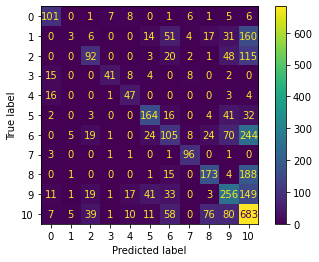

In [278]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

# Narrow down the Classes

In [279]:
# Combining Alt Music, Indie Alt, and Rock
y_train = y_train.replace(to_replace=[1, 6], value=10)
y_test = y_test.replace(to_replace=[1, 6], value=10)

In [280]:
params = {'n_neighbors':[1,5,10,20,30,40,50,60,70,80,90,100]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.6485829377484466
Best Parameters: {'n_neighbors': 30}


# Running the most accurate parameter for model

In [281]:
kNN = KNeighborsClassifier(30)
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       136
           2       0.66      0.19      0.29       281
           3       0.82      0.53      0.64        78
           4       0.51      0.62      0.56        71
           5       0.65      0.58      0.62       262
           7       0.81      0.93      0.87       103
           8       0.70      0.30      0.42       382
           9       0.57      0.30      0.40       531
          10       0.64      0.89      0.75      1756

    accuracy                           0.65      3600
   macro avg       0.67      0.56      0.58      3600
weighted avg       0.65      0.65      0.61      3600



# Create updated confusion matrix

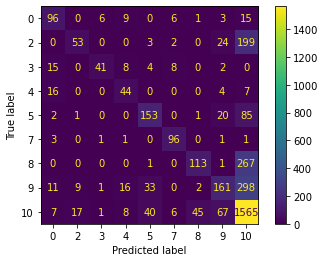

In [282]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

# Account for distance

In [283]:
kNN = KNeighborsClassifier(n_neighbors=30, weights='distance')
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       136
           2       0.57      0.17      0.27       281
           3       0.81      0.54      0.65        78
           4       0.54      0.62      0.58        71
           5       0.68      0.57      0.62       262
           7       0.82      0.94      0.87       103
           8       0.60      0.29      0.39       382
           9       0.50      0.29      0.37       531
          10       0.63      0.86      0.73      1756

    accuracy                           0.63      3600
   macro avg       0.64      0.56      0.57      3600
weighted avg       0.62      0.63      0.59      3600



# "Distance" confusion matrix

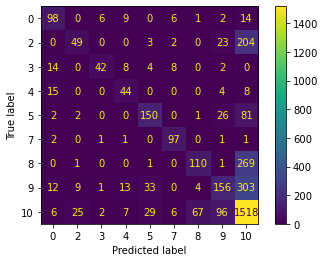

In [284]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

In [287]:
dataset = pd.read_csv(r"C:\Users\CaptM\OneDrive\Desktop\CSCE 4205\Group Project\train.csv")
X_train, X_test, y_train, y_test = train_test_split(dataset[feature_columns], dataset['Class'], 
                                                    test_size=0.2, random_state=42)
imp_mean = IterativeImputer(random_state=42)
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [288]:
kNN = KNeighborsClassifier(n_neighbors=30, weights='distance')
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       136
           1       0.03      0.02      0.02       286
           2       0.51      0.32      0.39       281
           3       0.79      0.54      0.64        78
           4       0.53      0.68      0.60        71
           5       0.66      0.60      0.63       262
           6       0.25      0.18      0.21       500
           7       0.79      0.94      0.86       103
           8       0.56      0.44      0.49       382
           9       0.46      0.46      0.46       531
          10       0.41      0.60      0.49       970

    accuracy                           0.45      3600
   macro avg       0.51      0.50      0.50      3600
weighted avg       0.44      0.45      0.43      3600



# Confusion Matrix: Weighted w/ all classes

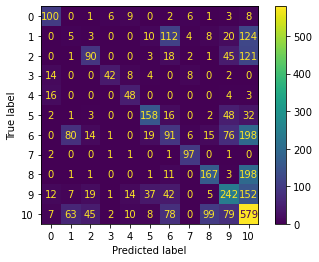

In [290]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

In [291]:
def find_class_name(test):
    name = ""
    if test == 0:
        name = "Acoustic/Folk"
    if test == 1:
        name = "Alt Music"
    if test == 2:
        name = "Blues"
    if test == 3:
        name = "Bollywood"
    if test == 4:
        name = "Country"
    if test == 5:
        name = "HipHop"
    if test == 6:
        name = "Indie Alt"
    if test == 7:
        name = "Instrumental"
    if test == 8:
        name = "Metal"
    if test == 9:
        name = "Pop"
    if test == 10:
        name = "Rock"
    return name

In [292]:
def class_prob(num):
    print("")
    print("{}".format(num+1))
    print("Probability of class:")
    print(kNN.predict_proba(X_test[num:num+1]))
    print("")
    pred = kNN.predict(X_test[num:num+1])
    pred = find_class_name(pred)
    actual = find_class_name(y_test.iloc[num])
    index = y_test.index[num]
    artist = dataset.iloc[index]["Artist Name"]
    song = dataset.iloc[index]["Track Name"]
    print("Artist: {}".format(artist))
    print("Song Name: {}".format(song))
    print("Prediction: {}".format(pred))
    print("Actual: {}".format(actual))
    

In [293]:
for k in range(0,3599):
    class_prob(k)


1
Probability of class:
[[0.         0.02934043 0.         0.         0.         0.81267772
  0.12481715 0.         0.         0.0331647  0.        ]]

Artist: ALLBLACK
Song Name: Ego
Prediction: HipHop
Actual: HipHop

2
Probability of class:
[[0.         0.06810639 0.03647329 0.         0.         0.
  0.1363311  0.         0.43815721 0.         0.32093201]]

Artist: Evildead
Song Name: Word of God
Prediction: Metal
Actual: Metal

3
Probability of class:
[[0.41507264 0.         0.06067393 0.20223066 0.13223122 0.
  0.03070043 0.02928107 0.         0.03411223 0.09569781]]

Artist: Jazim Sharma, Tajasvi Sharma
Song Name: Inteha
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

4
Probability of class:
[[0.         0.10289033 0.         0.         0.         0.
  0.13485271 0.         0.1969392  0.         0.56531777]]

Artist: Vertilizar
Song Name: Nobody's Favorite
Prediction: Rock
Actual: Metal

5
Probability of class:
[[0.         0.13763791 0.         0.         0.         0.03127742

55
Probability of class:
[[0.         0.12634808 0.         0.         0.         0.03516622
  0.10656032 0.         0.06598201 0.37558699 0.29035638]]

Artist: fun.
Song Name: Some Nights
Prediction: Pop
Actual: Rock

56
Probability of class:
[[0.         0.16101843 0.         0.         0.         0.
  0.09846356 0.         0.4789642  0.         0.26155381]]

Artist: Foals
Song Name: Black Bull
Prediction: Metal
Actual: Rock

57
Probability of class:
[[0.         0.20999435 0.         0.         0.         0.03150037
  0.42476114 0.         0.         0.06243635 0.27130778]]

Artist: Gunke
Song Name: Football
Prediction: Indie Alt
Actual: Rock

58
Probability of class:
[[0.0601032  0.02744138 0.         0.         0.29103905 0.
  0.05576361 0.         0.         0.09929206 0.46636069]]

Artist: Guns N' Roses
Song Name: Sweet Child O' Mine
Prediction: Rock
Actual: Rock

59
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Meg Myers
Song Name: Numb
Prediction: Rock
Ac

Actual: Rock

100
Probability of class:
[[0.07093934 0.         0.05723908 0.06768594 0.15086985 0.
  0.03355632 0.         0.         0.45766465 0.16204482]]

Artist: David Bowie
Song Name: China Girl - 2018 Remaster
Prediction: Pop
Actual: Rock

101
Probability of class:
[[0.  0.5 0.  0.  0.  0.  0.5 0.  0.  0.  0. ]]

Artist: The Jesus and Mary Chain
Song Name: Just Like Honey
Prediction: Alt Music
Actual: Rock

102
Probability of class:
[[0.         0.         0.06180215 0.         0.         0.02951128
  0.06168257 0.         0.         0.48065305 0.36635095]]

Artist: Dudu Aharon
Song Name: ◊í◊ô◊ë◊ï◊®
Prediction: Pop
Actual: Pop

103
Probability of class:
[[0.         0.09458325 0.31493547 0.         0.         0.03060823
  0.31109181 0.         0.         0.05996825 0.18881298]]

Artist: J.D. Short
Song Name: By The Spoonful
Prediction: Blues
Actual: Blues

104
Probability of class:
[[0.         0.12673999 0.         0.         0.         0.
  0.24150925 0.         0.30236627 0.

Artist: Tomorrows Bad Seeds
Song Name: Bad Seeds
Prediction: HipHop
Actual: Rock

146
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: The Vaccines
Song Name: If You Wanna
Prediction: Indie Alt
Actual: Rock

147
Probability of class:
[[0.49602227 0.         0.02932289 0.06199054 0.19062678 0.
  0.03715802 0.         0.         0.09104211 0.09383739]]

Artist: John Mayer
Song Name: Daughters
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

148
Probability of class:
[[0.         0.04473497 0.         0.         0.         0.
  0.         0.95526503 0.         0.         0.        ]]

Artist: Frédéric Chopin, Magdalena Hoffmann
Song Name: Valse in A Minor, Op. posth. B. 150 (Version for Harp in A Flat Minor)
Prediction: Instrumental
Actual: Instrumental

149
Probability of class:
[[0.         0.02643615 0.         0.         0.         0.
  0.         0.97356385 0.         0.         0.        ]]

Artist: Billy Childs
Song Name: It Never Entered My Mind
Prediction: Inst

  0.06298062 0.         0.08825117 0.27948948 0.497819  ]]

Artist: Charly Black
Song Name: Diggy Dee - Remix
Prediction: Rock
Actual: Pop

195
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

Artist: Celldweller
Song Name: Into the Void
Prediction: Metal
Actual: Metal

196
Probability of class:
[[0.         0.         0.18168717 0.         0.         0.10832751
  0.12599983 0.         0.         0.15986182 0.42412367]]

Artist: Meir Ariel
Song Name: ◊†◊©◊ú ◊î◊†◊ó◊©
Prediction: Rock
Actual: Rock

197
Probability of class:
[[0.         0.0961736  0.03196847 0.         0.         0.
  0.23919095 0.         0.06395363 0.12953833 0.43917502]]

Artist: Baby Queen
Song Name: Internet Religion
Prediction: Rock
Actual: Indie Alt

198
Probability of class:
[[0.         0.23453096 0.         0.         0.         0.
  0.29231369 0.         0.         0.07269449 0.40046086]]

Artist: Josiah and the Bonnevilles
Song Name: Stolen Love
Prediction: Rock
Actual: Alt Music

199
Probability o

  0.11994864 0.         0.0935269  0.54606294 0.06759144]]

Artist: Mor
Song Name: ◊ñ◊ô◊õ◊®◊ï◊ü ◊ô◊©◊ü
Prediction: Pop
Actual: Pop

254
Probability of class:
[[0.         0.16038716 0.10023325 0.         0.         0.27508525
  0.21886901 0.         0.         0.21365583 0.0317695 ]]

Artist: Revenge Wife
Song Name: Home
Prediction: HipHop
Actual: Pop

255
Probability of class:
[[0.         0.03212932 0.         0.         0.         0.23824288
  0.26540851 0.         0.         0.30089034 0.16332896]]

Artist: Nascent
Song Name: Lock It Up
Prediction: Pop
Actual: HipHop

256
Probability of class:
[[0.         0.1023603  0.         0.         0.         0.
  0.09683533 0.         0.36476231 0.         0.43604206]]

Artist: Radkey
Song Name: Seize
Prediction: Rock
Actual: Rock

257
Probability of class:
[[0.         0.13410431 0.16247567 0.         0.         0.04070687
  0.12661761 0.         0.         0.32384546 0.21225008]]

Artist: Stevie Salas
Song Name: Blind
Prediction: Pop
Actu

[[0.         0.         0.         0.         0.         0.81518009
  0.         0.         0.         0.12056737 0.06425255]]

Artist: Pooh Shiesty
Song Name: Neighbors (feat. BIG30)
Prediction: HipHop
Actual: HipHop

304
Probability of class:
[[0.         0.03111571 0.0728849  0.03371306 0.03213775 0.35707616
  0.26828742 0.         0.         0.17339705 0.03138795]]

Artist: Nego True
Song Name: Pick Your Poison
Prediction: HipHop
Actual: HipHop

305
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Bring Me The Horizon
Song Name: Throne
Prediction: Rock
Actual: Metal

306
Probability of class:
[[0.         0.10568098 0.         0.         0.         0.0664903
  0.3401322  0.         0.18539684 0.0794815  0.22281819]]

Artist: Godford
Song Name: Fear
Prediction: Indie Alt
Actual: Indie Alt

307
Probability of class:
[[0.         0.03324253 0.         0.         0.         0.36588911
  0.24229224 0.         0.         0.3273207  0.03125543]]

Artist: Lou Phelps
Song

Song Name: Jour 1
Prediction: Indie Alt
Actual: Alt Music

347
Probability of class:
[[0.         0.13072553 0.06449967 0.         0.         0.
  0.21338943 0.         0.13622003 0.10468951 0.35047582]]

Artist: Motion City Soundtrack
Song Name: The Future Freaks Me Out
Prediction: Rock
Actual: Rock

348
Probability of class:
[[0.         0.         0.12944011 0.         0.         0.
  0.09816201 0.         0.49619043 0.         0.27620745]]

Artist: Helices
Song Name: Una Historia para Acabar Con Todas las Historias
Prediction: Metal
Actual: Rock

349
Probability of class:
[[0.         0.13723062 0.05971022 0.         0.         0.10139143
  0.122708   0.         0.03587781 0.09178641 0.45129552]]

Artist: Hollis Brown
Song Name: Do Me Right
Prediction: Rock
Actual: Rock

350
Probability of class:
[[0.22467928 0.         0.         0.         0.         0.
  0.         0.77532072 0.         0.         0.        ]]

Artist: Reese Quartet
Song Name: Lost and Found
Prediction: Instrume

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Gnoomes
Song Name: Sword In the Stone
Prediction: Rock
Actual: Indie Alt

395
Probability of class:
[[0.         0.09996168 0.07202832 0.         0.         0.26461289
  0.10041147 0.         0.         0.36706304 0.09592261]]

Artist: Abstract Orchestra
Song Name: New Day
Prediction: Pop
Actual: HipHop

396
Probability of class:
[[0.         0.         0.         0.         0.         0.
  0.09568741 0.         0.72038106 0.         0.18393153]]

Artist: Rebel Wizard
Song Name: heavy negative wizard metal in-fucking-excelsis
Prediction: Metal
Actual: Metal

397
Probability of class:
[[0.         0.09107312 0.03260991 0.         0.         0.
  0.29642813 0.         0.16372123 0.04050365 0.37566396]]

Artist: This Will Destroy You
Song Name: Quiet
Prediction: Rock
Actual: Rock

398
Probability of class:
[[0.         0.         0.         0.         0.         0.50815077
  0.1123095  0.         0.         0.3490658  0.03047394]]

Artist: Tri

Artist: Soda State
Song Name: Gold - Club Soda Mix
Prediction: Pop
Actual: Indie Alt

437
Probability of class:
[[0.05778253 0.06916854 0.1455591  0.         0.         0.
  0.31911194 0.         0.         0.25630228 0.15207561]]

Artist: John Mayer
Song Name: Slow Dancing in a Burning Room - Acoustic
Prediction: Indie Alt
Actual: Pop

438
Probability of class:
[[0.24933437 0.         0.         0.33671367 0.20755691 0.
  0.05828712 0.06019928 0.02927724 0.02834135 0.03029007]]

Artist: Lata Mangeshkar
Song Name: Neela Aasman So Gaya - Lata Mangeshkar
Prediction: Bollywood
Actual: Bollywood

439
Probability of class:
[[0.         0.15802244 0.34330919 0.         0.         0.
  0.20156928 0.         0.         0.05833436 0.23876472]]

Artist: Dennis Quaid & The Sharks
Song Name: On My Way To Heaven
Prediction: Blues
Actual: Rock

440
Probability of class:
[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]]

Artist: Eliza & The Delusionals
Song Name: Just Exist
Prediction: Alt Music
Actual

Actual: Metal

484
Probability of class:
[[0.         0.06802955 0.1262781  0.         0.         0.03026416
  0.10787674 0.         0.         0.23331084 0.43424062]]

Artist: Kim Lenz & Her Jaguars
Song Name: Devil On My Shoulder
Prediction: Rock
Actual: Rock

485
Probability of class:
[[0.         0.20342554 0.         0.         0.         0.
  0.17159648 0.         0.06741556 0.06497695 0.49258547]]

Artist: Alice Cooper
Song Name: School's Out
Prediction: Rock
Actual: Rock

486
Probability of class:
[[0.         0.         0.         0.         0.02894112 0.
  0.05774764 0.         0.         0.82773692 0.08557432]]

Artist: Simply Red
Song Name: Stars - Live at Sydney Opera House
Prediction: Pop
Actual: Pop

487
Probability of class:
[[0.19288819 0.         0.         0.         0.15636623 0.
  0.06094332 0.         0.         0.52977714 0.06002513]]

Artist: Westlife
Song Name: Without You
Prediction: Pop
Actual: Pop

488
Probability of class:
[[0.         0.         0.02964571

  0.0344302  0.         0.         0.22149206 0.03460083]]

Artist: Saptak Chatterjee
Song Name: Paheli
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

532
Probability of class:
[[0.         0.         0.03454192 0.         0.         0.80854535
  0.         0.         0.         0.1223708  0.03454192]]

Artist: The Pharcyde
Song Name: Passin' Me By
Prediction: HipHop
Actual: HipHop

533
Probability of class:
[[0.03060473 0.0325853  0.49261646 0.         0.         0.
  0.22375418 0.         0.         0.06198788 0.15845145]]

Artist: Hans Theessink
Song Name: Living With The Blues
Prediction: Blues
Actual: Blues

534
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Stone Temple Pilots
Song Name: Vasoline
Prediction: Rock
Actual: Rock

535
Probability of class:
[[0.         0.03190156 0.03022672 0.         0.         0.
  0.03077551 0.         0.68238555 0.         0.22471066]]

Artist: Corvus Corax
Song Name: Ragnar√∂k - Era Metallum - Single Edit
Prediction: Metal

  0.14188697 0.         0.         0.16260554 0.        ]]

Artist: Chris Patrick
Song Name: Typical Shit
Prediction: HipHop
Actual: HipHop

580
Probability of class:
[[0.         0.06079873 0.         0.         0.         0.
  0.16823993 0.         0.1965767  0.06953696 0.50484768]]

Artist: Sevendust
Song Name: Denial
Prediction: Rock
Actual: Metal

581
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Zero 9:36
Song Name: Take Me Instead
Prediction: Rock
Actual: Alt Music

582
Probability of class:
[[0.         0.13677435 0.         0.         0.         0.03516292
  0.22681764 0.         0.         0.29305732 0.30818776]]

Artist: Arlo Parks
Song Name: Hope
Prediction: Rock
Actual: Alt Music

583
Probability of class:
[[0.         0.06159016 0.3374349  0.03411244 0.         0.07519973
  0.29122464 0.         0.         0.13196563 0.06847251]]

Artist: ghosthands
Song Name: intuition
Prediction: Blues
Actual: Pop

584
Probability of class:
[[0.         0.20077798 

Artist: MOSES
Song Name: You Need L
Prediction: Rock
Actual: Rock

625
Probability of class:
[[0.         0.02899199 0.06958676 0.         0.         0.02923028
  0.15778683 0.         0.10413938 0.12376654 0.48649823]]

Artist: Donbor
Song Name: Against the Law
Prediction: Rock
Actual: Indie Alt

626
Probability of class:
[[0.         0.0351291  0.03119135 0.         0.         0.02883157
  0.0351291  0.         0.58909388 0.         0.28062501]]

Artist: Black Pistol Fire
Song Name: Fleet Foot
Prediction: Metal
Actual: Rock

627
Probability of class:
[[0.         0.17728458 0.30071343 0.         0.         0.03369562
  0.2262272  0.         0.         0.08961644 0.17246273]]

Artist: Molly Burman
Song Name: everytime
Prediction: Blues
Actual: Rock

628
Probability of class:
[[0.         0.0949348  0.02930758 0.         0.         0.03152692
  0.12274077 0.         0.20079106 0.15622284 0.36447603]]

Artist: ShrekDiMC
Song Name: ◊¢◊ï◊ì
Prediction: Rock
Actual: HipHop

629
Probability 

[[0.         0.060268   0.         0.         0.         0.
  0.1978248  0.         0.13588682 0.         0.60602039]]

Artist: The Pigeon Detectives
Song Name: Take Her Back
Prediction: Rock
Actual: Indie Alt

675
Probability of class:
[[0.         0.09488134 0.         0.         0.         0.
  0.10753965 0.         0.20773311 0.06870529 0.5211406 ]]

Artist: Atreyu
Song Name: Warrior (feat. Travis Barker)
Prediction: Rock
Actual: Rock

676
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: Franz Ferdinand
Song Name: Walk Away
Prediction: Indie Alt
Actual: Alt Music

677
Probability of class:
[[0.         0.0897635  0.         0.         0.         0.03104957
  0.26344816 0.         0.         0.41638065 0.19935812]]

Artist: Itay Levi
Song Name: ◊î◊ï◊ú◊õ◊™ ◊ô◊ó◊§◊î
Prediction: Pop
Actual: Pop

678
Probability of class:
[[0.10138864 0.         0.         0.15400892 0.         0.
  0.03442659 0.71017585 0.         0.         0.        ]]

Artist: Ola W Jansson, Krist

  0.14275092 0.         0.         0.35142473 0.25628141]]

Artist: Etaoin
Song Name: Bedroom Walls
Prediction: Pop
Actual: Pop

726
Probability of class:
[[0.35974173 0.         0.09117966 0.35583313 0.06501844 0.
  0.03435181 0.         0.         0.02972564 0.06414959]]

Artist: Transformation
Song Name: Van Morrison
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

727
Probability of class:
[[0.         0.20536208 0.         0.         0.         0.03147076
  0.29467532 0.         0.16133935 0.06136516 0.24578733]]

Artist: The Stooges
Song Name: Gimme Danger - Bowie Mix
Prediction: Indie Alt
Actual: Rock

728
Probability of class:
[[0.         0.13073462 0.1082025  0.         0.         0.03246955
  0.13334458 0.         0.02978299 0.07011076 0.49535499]]

Artist: With Confidence
Song Name: Moving Boxes
Prediction: Rock
Actual: Rock

729
Probability of class:
[[0.         0.16463726 0.         0.         0.         0.03103262
  0.29875148 0.         0.13653754 0.         0.36904109

775
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: Sleater-Kinney
Song Name: Worry With You
Prediction: Indie Alt
Actual: Rock

776
Probability of class:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: Goat Girl
Song Name: Bang
Prediction: Alt Music
Actual: Indie Alt

777
Probability of class:
[[0.         0.03420666 0.16249145 0.         0.         0.03385636
  0.1676792  0.         0.         0.53666634 0.06509999]]

Artist: Pheeno
Song Name: Dish
Prediction: Pop
Actual: Pop

778
Probability of class:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: Mystery Jets
Song Name: Bubblegum
Prediction: Alt Music
Actual: Indie Alt

779
Probability of class:
[[0.         0.02991991 0.         0.         0.         0.
  0.03961636 0.         0.42495239 0.         0.50551134]]

Artist: Powerwolf
Song Name: Kiss of the Cobra King (New Version 2019)
Prediction: Rock
Actual: Metal

780
Probability of class:
[[0.         0.0663234  0.03456333 0.         0.         0.76698385
  0.1008

Probability of class:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: Blur
Song Name: Out of Time
Prediction: Alt Music
Actual: Indie Alt

823
Probability of class:
[[0.         0.04572595 0.         0.         0.         0.68831505
  0.06171409 0.         0.         0.1301498  0.07409511]]

Artist: Blu DeTiger
Song Name: Figure It Out
Prediction: HipHop
Actual: Pop

824
Probability of class:
[[0.         0.04523346 0.         0.         0.         0.
  0.14628665 0.         0.25297589 0.10974922 0.44575478]]

Artist: Static-X
Song Name: Hollow (Project Regeneration)
Prediction: Rock
Actual: Metal

825
Probability of class:
[[0.35442864 0.02979709 0.         0.09192036 0.26960388 0.
  0.02979709 0.         0.         0.09188668 0.13256626]]

Artist: Queen, David Bowie
Song Name: Under Pressure - Remastered 2011
Prediction: Acoustic/Folk
Actual: Rock

826
Probability of class:
[[0.         0.13476384 0.03179709 0.         0.         0.
  0.09425843 0.         0.03153765 0.14359929 0.56404

  0.14734312 0.         0.03600569 0.12347455 0.13659862]]

Artist: Noga Erez
Song Name: NO news on TV
Prediction: HipHop
Actual: Pop

868
Probability of class:
[[0.         0.13397894 0.03828879 0.         0.         0.09740193
  0.20824555 0.         0.         0.45347434 0.06861045]]

Artist: Alvaro Soler
Song Name: Magia
Prediction: Pop
Actual: Pop

869
Probability of class:
[[0.         0.06819965 0.0300459  0.         0.         0.
  0.2505454  0.         0.24433082 0.         0.40687823]]

Artist: Bullet For My Valentine
Song Name: Hand Of Blood
Prediction: Rock
Actual: Rock

870
Probability of class:
[[0.         0.12434293 0.         0.         0.         0.
  0.09360489 0.         0.31037142 0.02963591 0.44204483]]

Artist: U2
Song Name: The Fly
Prediction: Rock
Actual: Rock

871
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Mt. Eddy
Song Name: Metaphor
Prediction: Rock
Actual: Alt Music

872
Probability of class:
[[0.         0.0311792  0.03109691 0.   

Artist: Phoebe Bridgers
Song Name: Kyoto - Spotify Singles
Prediction: Pop
Actual: Alt Music

921
Probability of class:
[[0.         0.         0.         0.         0.         0.57643086
  0.06343272 0.         0.09503055 0.19958444 0.06552142]]

Artist: Ravid Plotnik
Song Name: ◊ë◊ï◊ù-◊©◊ê◊ß◊î-◊ú◊ê◊ß (◊†◊¶'◊ô ◊†◊¶')
Prediction: HipHop
Actual: HipHop

922
Probability of class:
[[0.68456469 0.         0.         0.02534563 0.03660583 0.
  0.         0.20467692 0.         0.04880693 0.        ]]

Artist: Elsmore Carey
Song Name: Come on Love
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

923
Probability of class:
[[0.         0.15553424 0.0310994  0.         0.         0.
  0.12373664 0.         0.16274903 0.         0.5268807 ]]

Artist: R.E.M.
Song Name: Country Feedback
Prediction: Rock
Actual: Rock

924
Probability of class:
[[0.         0.10173489 0.13661974 0.         0.         0.
  0.1596768  0.         0.0602669  0.10027201 0.44142965]]

Artist: Bonfire
Song Name: American Ni

Artist: Bring Me The Horizon
Song Name: MANTRA
Prediction: Rock
Actual: Rock

967
Probability of class:
[[0.         0.08934313 0.         0.         0.         0.02898421
  0.11895647 0.         0.06815287 0.29532612 0.3992372 ]]

Artist: Amy Macdonald
Song Name: This Is The Life
Prediction: Rock
Actual: Pop

968
Probability of class:
[[0.         0.13975727 0.06369764 0.         0.03016206 0.
  0.46312513 0.         0.         0.13988235 0.16337555]]

Artist: Albert King
Song Name: Crosscut Saw - Mono Mix
Prediction: Indie Alt
Actual: Blues

969
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

Artist: Ghost Iris
Song Name: Coda
Prediction: Metal
Actual: Rock

970
Probability of class:
[[0.         0.06758189 0.07365595 0.         0.         0.55726676
  0.03115684 0.         0.10515237 0.         0.16518619]]

Artist: GUM
Song Name: Airwalkin'
Prediction: HipHop
Actual: Indie Alt

971
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

Artist: The Foxies
Song Name:

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Mother Mother
Song Name: Forgotten Souls
Prediction: Rock
Actual: Indie Alt

1024
Probability of class:
[[0.         0.10167348 0.         0.         0.         0.06351941
  0.13956391 0.         0.03159265 0.02987841 0.63377214]]

Artist: A
Song Name: Nothing
Prediction: Rock
Actual: Metal

1025
Probability of class:
[[0.         0.12724197 0.         0.         0.         0.
  0.13798806 0.         0.30365085 0.         0.43111912]]

Artist: Aerosmith
Song Name: Shut Up And Dance
Prediction: Rock
Actual: Rock

1026
Probability of class:
[[0.         0.06808805 0.03445437 0.         0.         0.06533251
  0.16393851 0.         0.04776784 0.17055818 0.44986054]]

Artist: The 1975
Song Name: Girls
Prediction: Rock
Actual: Rock

1027
Probability of class:
[[0.         0.19229102 0.2702756  0.         0.         0.
  0.18745628 0.         0.09894556 0.02958235 0.22144918]]

Artist: Luther Allison
Song Name: Should I Wait
Prediction: Blues
Act

Actual: Rock

1076
Probability of class:
[[0.         0.03421841 0.32675694 0.         0.         0.09212542
  0.1890306  0.         0.         0.18904659 0.16882204]]

Artist: Sheryl Crow
Song Name: Soak Up The Sun
Prediction: Blues
Actual: Rock

1077
Probability of class:
[[0.22643846 0.15688453 0.09580402 0.         0.14042475 0.03306343
  0.06002439 0.         0.         0.         0.28736041]]

Artist: Westlife
Song Name: Queen of My Heart - Radio Edit
Prediction: Rock
Actual: Pop

1078
Probability of class:
[[0.         0.06618388 0.         0.         0.         0.73727083
  0.09438162 0.         0.         0.07288686 0.02927681]]

Artist: Tree Palm
Song Name: Disco Night
Prediction: HipHop
Actual: Indie Alt

1079
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: renforshort
Song Name: fall apart (with glaive)
Prediction: Rock
Actual: Alt Music

1080
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

Artist: Hudson Harris & Haim
Song Name: Blue in Gree

[[0.02957541 0.33293717 0.03094539 0.         0.         0.
  0.50856588 0.         0.         0.09797615 0.        ]]

Artist: Angel Olsen
Song Name: New Love Cassette (Mark Ronson Remix)
Prediction: Indie Alt
Actual: Indie Alt

1121
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

Artist: Slipknot
Song Name: Wait and Bleed
Prediction: Metal
Actual: Rock

1122
Probability of class:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: The Beaches
Song Name: Let's Go
Prediction: Alt Music
Actual: Rock

1123
Probability of class:
[[0.32818626 0.         0.         0.         0.02722155 0.
  0.05380153 0.53612159 0.02720945 0.02745962 0.        ]]

Artist: Duponte et Duponte
Song Name: Chimes
Prediction: Instrumental
Actual: Instrumental

1124
Probability of class:
[[0.4146656  0.03128274 0.         0.06235205 0.22321481 0.
  0.03002375 0.09953845 0.0309109  0.03099945 0.07701225]]

Artist: The Beatles
Song Name: Blackbird - Remastered 2009
Prediction: Acoustic/Folk
Actual: Acoustic/F

Artist: Bryan Adams
Song Name: Tonight We Have The Stars
Prediction: Rock
Actual: Rock

1165
Probability of class:
[[0.         0.090492   0.07177322 0.         0.         0.02912518
  0.27174335 0.         0.         0.47554722 0.06131903]]

Artist: Omer Adam
Song Name: ◊®◊ó◊ï◊ß ◊û◊õ◊ï◊ú◊ù
Prediction: Pop
Actual: Pop

1166
Probability of class:
[[0.         0.03250211 0.06694761 0.         0.         0.
  0.20004189 0.         0.31822729 0.         0.3822811 ]]

Artist: Reb Beach
Song Name: Aurora Borealis
Prediction: Rock
Actual: Metal

1167
Probability of class:
[[0.         0.09985188 0.03695145 0.         0.         0.
  0.17771723 0.         0.19587413 0.03207007 0.45753524]]

Artist: Filter
Song Name: Where Do We Go From Here
Prediction: Rock
Actual: Metal

1168
Probability of class:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Artist: Outkast
Song Name: Hey Ya!
Prediction: HipHop
Actual: Pop

1169
Probability of class:
[[0.         0.10603751 0.07330442 0.         0.         0.0301817

[[0.         0.06352978 0.49072624 0.         0.         0.
  0.18526071 0.         0.         0.03261859 0.22786468]]

Artist: Donny Hathaway
Song Name: To Be Young, Gifted and Black
Prediction: Blues
Actual: HipHop

1213
Probability of class:
[[0.         0.09625417 0.         0.         0.         0.
  0.10115561 0.         0.10215477 0.40101611 0.29941933]]

Artist: Twenty One Pilots
Song Name: Shy Away
Prediction: Pop
Actual: Pop

1214
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Aerosmith
Song Name: Mama Kin
Prediction: Rock
Actual: Blues

1215
Probability of class:
[[0.         0.09598048 0.0322843  0.         0.         0.02883345
  0.20302055 0.         0.07031155 0.         0.56956968]]

Artist: U2
Song Name: Bad - Remastered 2009
Prediction: Rock
Actual: Rock

1216
Probability of class:
[[0.         0.11051753 0.09803716 0.         0.         0.04068781
  0.17663891 0.         0.03177323 0.12130802 0.42103734]]

Artist: Weezer
Song Name: All the Good O

[[0.         0.06481262 0.12871764 0.         0.         0.03045422
  0.14906957 0.         0.         0.29663422 0.33031174]]

Artist: Kobi Aflalo
Song Name: ◊¢◊ì ◊©◊ô◊ë◊ï◊ê
Prediction: Rock
Actual: Pop

1266
Probability of class:
[[0.4866601  0.         0.03851079 0.16585708 0.02920139 0.
  0.         0.09169372 0.         0.13042041 0.05765649]]

Artist: Asha Bhosle, Mahendra Kapoor
Song Name: Maine Ek Khwab Sa Dekha
Prediction: Acoustic/Folk
Actual: Bollywood

1267
Probability of class:
[[0.         0.09303361 0.         0.         0.         0.03189406
  0.09303361 0.         0.42249694 0.         0.35954179]]

Artist: Otherkin
Song Name: Yeah, I Know
Prediction: Metal
Actual: Rock

1268
Probability of class:
[[0.         0.08786203 0.         0.         0.         0.
  0.07960959 0.         0.30606641 0.07082811 0.45563385]]

Artist: Mansun
Song Name: Wide Open Space
Prediction: Rock
Actual: Indie Alt

1269
Probability of class:
[[0.         0.22509898 0.         0.         0.   

Artist: Pop Unknown
Song Name: Half Of Ninety
Prediction: Pop
Actual: Rock

1320
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

Artist: Attack Attack!
Song Name: Brachyura Bombshell
Prediction: Metal
Actual: Rock

1321
Probability of class:
[[0.         0.06227221 0.28656064 0.         0.         0.
  0.21812194 0.         0.         0.20865215 0.22439306]]

Artist: Haim Moshe
Song Name: ◊ê◊î◊ë◊™ ◊ó◊ô◊ô
Prediction: Blues
Actual: Pop

1322
Probability of class:
[[0.         0.         0.         0.06259033 0.12162544 0.0616575
  0.02922616 0.         0.         0.61094562 0.11395495]]

Artist: Kali Uchis
Song Name: telepatía
Prediction: Pop
Actual: Pop

1323
Probability of class:
[[0.         0.19658756 0.10336853 0.         0.         0.
  0.14289978 0.         0.09021988 0.10158202 0.36534223]]

Artist: Steffen Morrison
Song Name: Hold on Lovers
Prediction: Rock
Actual: Pop

1324
Probability of class:
[[0.         0.17763177 0.         0.         0.         0.
  0.1797917

Artist: The Killers
Song Name: Dying Breed
Prediction: Rock
Actual: Rock

1371
Probability of class:
[[0.         0.03028066 0.06286532 0.         0.         0.02860939
  0.16408363 0.         0.02916092 0.29136455 0.39363553]]

Artist: ISLAND
Song Name: The Day I Die
Prediction: Rock
Actual: Rock

1372
Probability of class:
[[0.         0.02937405 0.16648844 0.         0.         0.03008186
  0.06217182 0.         0.         0.53671054 0.17517329]]

Artist: Welshly Arms
Song Name: Legendary - Acoustic
Prediction: Pop
Actual: Rock

1373
Probability of class:
[[0.         0.10560733 0.         0.         0.         0.
  0.09830371 0.         0.59707549 0.03204045 0.16697302]]

Artist: Metallica
Song Name: Whiplash - Remastered
Prediction: Metal
Actual: Metal

1374
Probability of class:
[[0.         0.06839615 0.06485488 0.         0.         0.06168635
  0.06650614 0.         0.34694113 0.0317335  0.35988185]]

Artist: TOOL
Song Name: √Ünema
Prediction: Rock
Actual: Metal

1375
Probabil

  0.9419671 0.        0.        0.       ]]

Artist: Esteban Delano
Song Name: Lola
Prediction: Instrumental
Actual: Instrumental

1422
Probability of class:
[[0.         0.06451668 0.09339476 0.         0.         0.03302802
  0.06175039 0.         0.03491333 0.45256768 0.25982916]]

Artist: alexmaax
Song Name: Bets Off
Prediction: Pop
Actual: Indie Alt

1423
Probability of class:
[[0.         0.13107927 0.         0.         0.         0.
  0.19479035 0.         0.40477457 0.0332626  0.23609321]]

Artist: Guns N' Roses
Song Name: Rocket Queen
Prediction: Metal
Actual: Rock

1424
Probability of class:
[[0.         0.13338777 0.         0.         0.         0.
  0.12765054 0.         0.03127191 0.11153213 0.59615765]]

Artist: No Love For The Middle Child
Song Name: Older
Prediction: Rock
Actual: Rock

1425
Probability of class:
[[0.         0.06018243 0.34498439 0.         0.         0.06316885
  0.09839022 0.         0.         0.19329215 0.23998196]]

Artist: Trudy Lynn
Song Name: 

[[0.         0.         0.03067266 0.         0.         0.
  0.06204879 0.         0.63486096 0.         0.27241759]]

Artist: Path of Destiny
Song Name: The Division of a Spiral Synergy
Prediction: Metal
Actual: Metal

1473
Probability of class:
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: Keb' Mo'
Song Name: The Medicine Man [Feat. Old Crow Medicine Show]
Prediction: Blues
Actual: Alt Music

1474
Probability of class:
[[0.82772962 0.         0.         0.03156759 0.04377075 0.
  0.03487845 0.06205359 0.         0.         0.        ]]

Artist: Lissie
Song Name: Best Days - Acoustic
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

1475
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Nothing
Song Name: Zero Day
Prediction: Rock
Actual: Indie Alt

1476
Probability of class:
[[0.         0.09391576 0.         0.         0.         0.
  0.13639742 0.         0.02999128 0.06745174 0.67224379]]

Artist: Mumford & Sons
Song Name: Believe
Prediction: Rock
Actual: Rock

1

Artist: Zozo Ginzburg
Song Name: Filthy Morning
Prediction: Indie Alt
Actual: Pop

1527
Probability of class:
[[0.         0.09730517 0.         0.         0.         0.44280721
  0.06311612 0.         0.03212933 0.20872899 0.15591318]]

Artist: N.O.R.E.
Song Name: Superthug
Prediction: HipHop
Actual: HipHop

1528
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Tigercub
Song Name: Stop Beating on My Heart (Like a Bass Drum)
Prediction: Rock
Actual: Alt Music

1529
Probability of class:
[[0.         0.0933856  0.         0.         0.09668724 0.06940887
  0.09310277 0.         0.03504949 0.41615149 0.19621453]]

Artist: Britney Spears
Song Name: Radar
Prediction: Pop
Actual: Pop

1530
Probability of class:
[[0.         0.02974082 0.19613505 0.         0.         0.
  0.06320534 0.         0.20666213 0.         0.50425666]]

Artist: Mazzy Star
Song Name: She Hangs Brightly
Prediction: Rock
Actual: Indie Alt

1531
Probability of class:
[[0.         0.06387884 0.       

Artist: ILLENIUM
Song Name: Crawl Outta Love - The Glitch Mob Remix
Prediction: Metal
Actual: Rock

1583
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Karma To Burn
Song Name: Fifty Seven
Prediction: Rock
Actual: Metal

1584
Probability of class:
[[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.5 0. ]]

Artist: lentra
Song Name: o shit!
Prediction: Indie Alt
Actual: Alt Music

1585
Probability of class:
[[0.02836041 0.13373116 0.10912685 0.         0.         0.03372234
  0.11006458 0.         0.05704558 0.10643543 0.42151366]]

Artist: Incubus
Song Name: I Miss You
Prediction: Rock
Actual: Rock

1586
Probability of class:
[[0.02941872 0.0347414  0.02899315 0.         0.         0.39553784
  0.18413161 0.         0.         0.19794421 0.12923307]]

Artist: Julia Wolf
Song Name: In My Way
Prediction: HipHop
Actual: Indie Alt

1587
Probability of class:
[[0.         0.         0.20573358 0.         0.         0.43688753
  0.06348299 0.         0.         0.161774   0.1321219

Artist: Boston Manor
Song Name: Bad Machine
Prediction: Rock
Actual: Alt Music

1634
Probability of class:
[[0.         0.1015746  0.         0.         0.         0.
  0.20062992 0.         0.         0.55730157 0.14049391]]

Artist: Whethan
Song Name: Hurting on Purpose (feat. K.Flay)
Prediction: Pop
Actual: Rock

1635
Probability of class:
[[0.         0.09845763 0.         0.         0.         0.02976657
  0.18860618 0.         0.09167653 0.06815821 0.52333488]]

Artist: Menta
Song Name: Ocho Domingos
Prediction: Rock
Actual: Indie Alt

1636
Probability of class:
[[0.         0.20200164 0.13132689 0.         0.         0.03343622
  0.23007928 0.         0.         0.07056626 0.33258972]]

Artist: Michael Burks
Song Name: What Are You Doin' to Me
Prediction: Rock
Actual: Blues

1637
Probability of class:
[[0.         0.10049608 0.03021697 0.         0.         0.
  0.23893391 0.         0.18627242 0.         0.44408063]]

Artist: Asobi Seksu
Song Name: Thursday
Prediction: Rock
Act

  0.03129592 0.         0.         0.29869551 0.3066568 ]]

Artist: Alexis Korner's Blues Incorporated
Song Name: Rain Is Such a Lonesome Sound - Remastered
Prediction: Rock
Actual: Blues

1687
Probability of class:
[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]]

Artist: Pillow Queens
Song Name: Liffey
Prediction: Alt Music
Actual: Indie Alt

1688
Probability of class:
[[0.         0.0320897  0.06281556 0.         0.         0.03417767
  0.19424936 0.         0.1355854  0.         0.54108231]]

Artist: Tim Montana
Song Name: Do It Fast
Prediction: Rock
Actual: Rock

1689
Probability of class:
[[0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.5 0. ]]

Artist: BROCKHAMPTON
Song Name: BANKROLL (feat. A$AP Rocky & A$AP Ferg)
Prediction: HipHop
Actual: Alt Music

1690
Probability of class:
[[0.         0.10403419 0.         0.         0.         0.
  0.16428081 0.         0.03765526 0.10268077 0.59134896]]

Artist: MOD SUN
Song Name: Karma
Prediction: Rock
Actual: Pop

1691
Probability of class:
[[0

Artist: Freya Ridings
Song Name: Castles - Acoustic
Prediction: Pop
Actual: Pop

1742
Probability of class:
[[0.         0.09992097 0.43915029 0.         0.         0.
  0.11993293 0.         0.03045508 0.         0.31054072]]

Artist: Shalom Hanoch
Song Name: ◊ò◊ô◊ï◊ú ◊ú◊ô◊§◊ï
Prediction: Blues
Actual: Rock

1743
Probability of class:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: Asquith
Song Name: NFT - Bass Mix
Prediction: Alt Music
Actual: Indie Alt

1744
Probability of class:
[[0.         0.16415622 0.06512649 0.         0.         0.
  0.0904951  0.         0.         0.36482741 0.31539477]]

Artist: Miynt
Song Name: A bite of papaya
Prediction: Pop
Actual: Indie Alt

1745
Probability of class:
[[0.         0.06783042 0.07019755 0.         0.         0.03024158
  0.24708288 0.         0.0938285  0.25837315 0.2324459 ]]

Artist: Stella Got
Song Name: ◊ß◊û◊ò
Prediction: Pop
Actual: Indie Alt

1746
Probability of class:
[[0.09712666 0.03006695 0.         0.         0.22093104 0.
  0

Artist: Marcus King
Song Name: The Well
Prediction: Blues
Actual: Rock

1795
Probability of class:
[[0.         0.12346994 0.03137239 0.         0.         0.03406649
  0.44939509 0.         0.         0.16404128 0.19765482]]

Artist: Anson Seabra
Song Name: Magazines
Prediction: Indie Alt
Actual: Pop

1796
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

Artist: Luc Brooks
Song Name: London Plane
Prediction: Instrumental
Actual: Instrumental

1797
Probability of class:
[[0.         0.17475289 0.10036158 0.         0.         0.0293215
  0.11308057 0.         0.19914461 0.0850418  0.29829707]]

Artist: Keane
Song Name: Sovereign Light Caf√©
Prediction: Rock
Actual: Rock

1798
Probability of class:
[[0.06260162 0.         0.         0.         0.35981094 0.03172861
  0.06055769 0.         0.03026269 0.22563403 0.22940442]]

Artist: Brantley Gilbert, T.I.
Song Name: Bottoms Up - Remix
Prediction: Country
Actual: Country

1799
Probability of class:
[[0.         0.10607308 0.   

  0.20678992 0.         0.         0.19736928 0.29604905]]

Artist: Eyal Golan
Song Name: ◊ú◊ë ◊©◊ú ◊í◊ë◊®
Prediction: Rock
Actual: Pop

1848
Probability of class:
[[0.09941205 0.         0.         0.09267807 0.34739655 0.
  0.09202686 0.         0.         0.23602252 0.13246395]]

Artist: Willie Jones
Song Name: Down For It
Prediction: Country
Actual: Country

1849
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

Artist: Holborns
Song Name: Walking on Clouds
Prediction: Instrumental
Actual: Instrumental

1850
Probability of class:
[[0.         0.10300983 0.12829643 0.         0.         0.10624072
  0.13127029 0.         0.03033321 0.20262514 0.29822438]]

Artist: Hadag Nahash
Song Name: ◊©◊û◊©
Prediction: Rock
Actual: HipHop

1851
Probability of class:
[[0.  0.5 0.  0.  0.  0.  0.5 0.  0.  0.  0. ]]

Artist: Alex Lahey
Song Name: Perth Traumatic Stress Disorder
Prediction: Alt Music
Actual: Rock

1852
Probability of class:
[[0.         0.06058862 0.         0.         0. 

Artist: Six Feet Under
Song Name: TNT
Prediction: Rock
Actual: Metal

1898
Probability of class:
[[0.         0.17013089 0.09594358 0.         0.         0.0309087
  0.12831488 0.         0.1014476  0.09574986 0.37750449]]

Artist: Tuna
Song Name: ◊û◊®◊§◊ß◊ô◊ù
Prediction: Rock
Actual: HipHop

1899
Probability of class:
[[0.03151415 0.09759259 0.16701982 0.         0.06190019 0.07726337
  0.23723376 0.         0.         0.031112   0.29636412]]

Artist: Carl Perkins
Song Name: Blue Suede Shoes
Prediction: Rock
Actual: Rock

1900
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Hockey Dad
Song Name: I Missed Out
Prediction: Rock
Actual: Alt Music

1901
Probability of class:
[[0.         0.02825656 0.         0.         0.49681996 0.
  0.0298389  0.         0.02862321 0.11041959 0.30604177]]

Artist: The Rolling Stones
Song Name: (I Can't Get No) Satisfaction - Mono Version
Prediction: Country
Actual: Rock

1902
Probability of class:
[[0.         0.031125   0.03344169 0

  0.23301208 0.         0.40234309 0.         0.26695497]]

Artist: Syberia
Song Name: Empire of Oppression
Prediction: Metal
Actual: Metal

1954
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

Artist: Twenty One Pilots
Song Name: Choker
Prediction: Pop
Actual: Rock

1955
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: The Goodnight Darlings
Song Name: Heavy
Prediction: Indie Alt
Actual: Alt Music

1956
Probability of class:
[[0.         0.02971475 0.0292292  0.         0.12149697 0.
  0.12978945 0.         0.         0.06610456 0.62366507]]

Artist: The Beach Boys
Song Name: Surfin' U.S.A. - Remastered 2001
Prediction: Rock
Actual: Rock

1957
Probability of class:
[[0.         0.02837278 0.03147999 0.02941327 0.         0.
  0.         0.91073396 0.         0.         0.        ]]

Artist: Christian Lindquist
Song Name: It's for You Evelina
Prediction: Instrumental
Actual: Instrumental

1958
Probability of class:
[[0.         0.13454453 0.06986651 0.   

Artist: Cupidon
Song Name: Wake Up, Get Down
Prediction: HipHop
Actual: Alt Music

2007
Probability of class:
[[0.         0.1199311  0.         0.         0.         0.
  0.03069033 0.         0.76507317 0.         0.0843054 ]]

Artist: Abbie Falls
Song Name: No One's Above
Prediction: Metal
Actual: Metal

2008
Probability of class:
[[0.         0.13359838 0.03378039 0.         0.         0.03221021
  0.1356681  0.         0.26105678 0.06780129 0.33588484]]

Artist: Jenny Hval
Song Name: Lions (feat. Vivian Wang)
Prediction: Rock
Actual: Indie Alt

2009
Probability of class:
[[0.         0.21336958 0.03048071 0.         0.         0.
  0.56624732 0.         0.06478679 0.06480622 0.06030938]]

Artist: Sam Sparro
Song Name: Happiness - The Magician Remix
Prediction: Indie Alt
Actual: Indie Alt

2010
Probability of class:
[[0.         0.         0.20818886 0.         0.         0.03520469
  0.38041266 0.         0.         0.21541377 0.16078002]]

Artist: Devek
Song Name: ◊ë◊©◊ù ◊î◊ì◊û◊ï

[[0.         0.03219296 0.0345081  0.         0.         0.56968865
  0.30270996 0.         0.         0.06090033 0.        ]]

Artist: UniBe@t
Song Name: Expectations
Prediction: HipHop
Actual: Indie Alt

2058
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: Violent Femmes
Song Name: Blister In The Sun
Prediction: Indie Alt
Actual: Alt Music

2059
Probability of class:
[[0.         0.18729346 0.10230883 0.         0.         0.02936264
  0.13470544 0.         0.         0.18880711 0.35752252]]

Artist: Arik Einstein
Song Name: ◊ô◊© ◊ë◊ô ◊ê◊î◊ë◊î
Prediction: Rock
Actual: Rock

2060
Probability of class:
[[0.         0.         0.68301469 0.         0.         0.
  0.0608933  0.         0.         0.03023746 0.22585454]]

Artist: Alberta Adams
Song Name: Chains Of Love
Prediction: Blues
Actual: Blues

2061
Probability of class:
[[0.         0.0689609  0.         0.         0.         0.
  0.07236372 0.         0.56569986 0.         0.29297553]]

Artist: Equilibrium
So

Artist: The Wannadies
Song Name: Hit
Prediction: Indie Alt
Actual: Alt Music

2110
Probability of class:
[[0.         0.04288512 0.         0.         0.         0.
  0.23381861 0.         0.37050112 0.03024246 0.3225527 ]]

Artist: Ride
Song Name: Drive Blind - 2001 Remaster
Prediction: Metal
Actual: Rock

2111
Probability of class:
[[0.         0.06120012 0.14360196 0.         0.         0.
  0.16081015 0.         0.16543848 0.06129765 0.40765163]]

Artist: Silent Theory
Song Name: The Price
Prediction: Rock
Actual: Metal

2112
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: POORSTACY
Song Name: Public Enemy
Prediction: Indie Alt
Actual: Alt Music

2113
Probability of class:
[[0.         0.09715209 0.         0.         0.         0.03347008
  0.06595722 0.         0.2636239  0.0314691  0.50832761]]

Artist: Gary Clark Jr.
Song Name: This Land
Prediction: Rock
Actual: Rock

2114
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: cleopatrick
Song N

Artist: To The Grave
Song Name: Miserable Summer
Prediction: Rock
Actual: Metal

2164
Probability of class:
[[0.         0.13661867 0.05763926 0.         0.         0.
  0.1370641  0.         0.0940558  0.10764566 0.4669765 ]]

Artist: The Record Company
Song Name: I Wanna Get High
Prediction: Rock
Actual: Rock

2165
Probability of class:
[[0.21948108 0.         0.         0.06681113 0.41378798 0.
  0.         0.         0.         0.20691229 0.09300751]]

Artist: Vishal Mishra
Song Name: Kaise Hua
Prediction: Country
Actual: Bollywood

2166
Probability of class:
[[0.         0.         0.         0.         0.         0.84277902
  0.03102485 0.         0.         0.12619613 0.        ]]

Artist: Young M.A
Song Name: Hello Baby feat. Fivio Foreign
Prediction: HipHop
Actual: HipHop

2167
Probability of class:
[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]]

Artist: Phoxjaw
Song Name: Trophies in the Attic
Prediction: Alt Music
Actual: Indie Alt

2168
Probability of class:
[[0.         0

Artist: Nairobi
Song Name: Funky Soul Makossa
Prediction: Indie Alt
Actual: HipHop

2215
Probability of class:
[[0.         0.10355479 0.         0.         0.         0.
  0.13146736 0.         0.16855713 0.03349724 0.56292347]]

Artist: Florence + The Machine
Song Name: Kiss With A Fist
Prediction: Rock
Actual: Indie Alt

2216
Probability of class:
[[0.06218251 0.06067595 0.13857723 0.         0.         0.04216735
  0.17360454 0.         0.         0.32185924 0.20093317]]

Artist: Ginger Jamie
Song Name: Goodbye to Love
Prediction: Pop
Actual: Pop

2217
Probability of class:
[[0.         0.23732717 0.06119027 0.         0.         0.
  0.33942579 0.         0.         0.03073346 0.3313233 ]]

Artist: The La's
Song Name: There She Goes
Prediction: Indie Alt
Actual: Indie Alt

2218
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: So It Begins
Song Name: Fenrir
Prediction: Rock
Actual: Metal

2219
Probability of class:
[[0.         0.11023506 0.         0.         0.

  0.18410267 0.         0.24651616 0.11288257 0.39010115]]

Artist: Blood Cultures
Song Name: Set it on Fire
Prediction: Rock
Actual: Pop

2271
Probability of class:
[[0.         0.0293274  0.         0.         0.         0.
  0.05995689 0.         0.19919612 0.         0.71151959]]

Artist: We Were Sharks
Song Name: New Low
Prediction: Rock
Actual: Rock

2272
Probability of class:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: The Strangeloves
Song Name: I Want Candy
Prediction: Alt Music
Actual: Indie Alt

2273
Probability of class:
[[0.         0.13802746 0.15374698 0.         0.         0.
  0.12032522 0.         0.         0.22773705 0.36016328]]

Artist: nicopop.
Song Name: Happy Again
Prediction: Rock
Actual: Pop

2274
Probability of class:
[[0.         0.         0.03052309 0.         0.         0.
  0.06533149 0.         0.63448814 0.         0.26965728]]

Artist: Fleshkiller
Song Name: Parallel Kingdom
Prediction: Metal
Actual: Metal

2275
Probability of class:
[[0.         0

2324
Probability of class:
[[0.         0.26868366 0.03441835 0.         0.         0.
  0.19855925 0.         0.09318132 0.19882066 0.20633676]]

Artist: Josh Gallagher
Song Name: Bright Side
Prediction: Alt Music
Actual: Rock

2325
Probability of class:
[[0.         0.06173793 0.18958899 0.         0.         0.
  0.24534649 0.         0.03749286 0.13720142 0.32863231]]

Artist: Cross My Heart
Song Name: The Great Depression
Prediction: Rock
Actual: Rock

2326
Probability of class:
[[0.03205776 0.         0.         0.         0.67732141 0.
  0.         0.         0.         0.12548934 0.16513149]]

Artist: Hunter Hayes
Song Name: I Want Crazy - Encore
Prediction: Country
Actual: Country

2327
Probability of class:
[[0.         0.1632353  0.         0.         0.         0.6764933
  0.09679766 0.         0.         0.06347374 0.        ]]

Artist: Deante' Hitchcock
Song Name: D√©j√† Vu (feat. Guapdad 4000)
Prediction: HipHop
Actual: HipHop

2328
Probability of class:
[[0.         0.0

  0.16310079 0.         0.         0.33904029 0.29049183]]

Artist: Status Quo
Song Name: Whatever You Want
Prediction: Pop
Actual: Blues

2375
Probability of class:
[[0.         0.15869677 0.09420094 0.19971827 0.         0.
  0.06256595 0.         0.         0.41671052 0.06810756]]

Artist: Freya Ridings
Song Name: Unconditional
Prediction: Pop
Actual: Pop

2376
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

Artist: Ryan Turtle Trio
Song Name: I Loves You, Porgy
Prediction: Instrumental
Actual: Instrumental

2377
Probability of class:
[[0.         0.0299407  0.         0.         0.         0.
  0.13150881 0.         0.48421813 0.03350334 0.32082902]]

Artist: Death
Song Name: Voice of the Soul
Prediction: Metal
Actual: Metal

2378
Probability of class:
[[0.         0.0948197  0.         0.         0.         0.03484515
  0.09790677 0.         0.03189473 0.54763657 0.19289709]]

Artist: Stand Atlantic
Song Name: deathwish (feat. nothing,nowhere.)
Prediction: Pop
Actual: 

Artist: Lootpack
Song Name: Whenimondamic
Prediction: HipHop
Actual: HipHop

2426
Probability of class:
[[0.39686073 0.         0.02885256 0.02997816 0.03381122 0.0292234
  0.         0.         0.03138037 0.33126048 0.11863307]]

Artist: Suhel Rais Khan, Ustad Sultan Khan
Song Name: Sitar Symphony - Original
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

2427
Probability of class:
[[0.         0.         0.38986045 0.         0.         0.03165534
  0.09194006 0.         0.16332445 0.16280355 0.16041616]]

Artist: Acqua Fragile
Song Name: Mass-Media Stars
Prediction: Blues
Actual: Rock

2428
Probability of class:
[[0.         0.         0.         0.         0.         0.
  0.09579344 0.         0.47028107 0.         0.43392549]]

Artist: Asia
Song Name: Sole Survivor
Prediction: Metal
Actual: Rock

2429
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: Yo La Tengo
Song Name: Autumn Sweater
Prediction: Indie Alt
Actual: Alt Music

2430
Probability of class:
[[0.064

  0.10319621 0.         0.         0.49685332 0.1640622 ]]

Artist: Alfie Templeman
Song Name: Everybody‚Äôs Gonna Love Somebody - Edit
Prediction: Pop
Actual: Indie Alt

2478
Probability of class:
[[0.         0.         0.         0.         0.         0.
  0.12579654 0.         0.58579476 0.         0.2884087 ]]

Artist: Deadlights
Song Name: Born of a Lie
Prediction: Metal
Actual: Rock

2479
Probability of class:
[[0.         0.         0.         0.         0.         0.87593635
  0.         0.         0.         0.12406365 0.        ]]

Artist: Coi Leray
Song Name: BIG PURR (Prrdd) (feat. Pooh Shiesty)
Prediction: HipHop
Actual: HipHop

2480
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Kyuss
Song Name: Space Cadet
Prediction: Rock
Actual: Metal

2481
Probability of class:
[[0.         0.03184167 0.         0.         0.         0.
  0.         0.         0.72646252 0.03044056 0.21125525]]

Artist: Dimmu Borgir
Song Name: Mourning Palace
Prediction: Metal
Ac

  0.16218282 0.         0.         0.06737001 0.3783072 ]]

Artist: Hank Mizell
Song Name: Jungle Rock
Prediction: Rock
Actual: Rock

2529
Probability of class:
[[0.         0.20271555 0.         0.         0.         0.
  0.16895042 0.         0.09576473 0.03042823 0.50214107]]

Artist: Rallye
Song Name: Univers
Prediction: Rock
Actual: Indie Alt

2530
Probability of class:
[[0.         0.06059052 0.         0.         0.         0.
  0.03073307 0.         0.33730246 0.0904408  0.48093314]]

Artist: Kitsune
Song Name: A Place To Be Safe
Prediction: Rock
Actual: Rock

2531
Probability of class:
[[0.         0.         0.03683892 0.         0.         0.76673001
  0.03265596 0.         0.         0.12693619 0.03683892]]

Artist: Scarface
Song Name: Smile
Prediction: HipHop
Actual: HipHop

2532
Probability of class:
[[0.         0.19224298 0.06806833 0.         0.         0.
  0.19693872 0.         0.20316955 0.10262697 0.23695344]]

Artist: Jimi Hendrix
Song Name: Mannish Boy
Prediction

  0.4059791  0.         0.03286556 0.12888648 0.12341486]]

Artist: David Bowie
Song Name: Sound and Vision - 1999 Remaster
Prediction: Indie Alt
Actual: Alt Music

2581
Probability of class:
[[0.         0.129737   0.2248137  0.03294878 0.         0.04807351
  0.0945812  0.         0.09999029 0.19585169 0.17400384]]

Artist: Pentangle
Song Name: Light Flight
Prediction: Blues
Actual: Indie Alt

2582
Probability of class:
[[0.         0.15423936 0.         0.         0.         0.
  0.18843624 0.         0.13837025 0.         0.51895415]]

Artist: Breaking Benjamin
Song Name: Dear Agony
Prediction: Rock
Actual: Rock

2583
Probability of class:
[[0.         0.09491529 0.03665558 0.         0.         0.
  0.20213792 0.         0.03158287 0.10134673 0.53336161]]

Artist: Wings
Song Name: Band On The Run - Remastered 2010
Prediction: Rock
Actual: Rock

2584
Probability of class:
[[0.         0.09643765 0.         0.         0.         0.
  0.12284632 0.         0.10336722 0.13335377 0.543

Artist: Bleachers
Song Name: Stop Making This Hurt
Prediction: Rock
Actual: Alt Music

2634
Probability of class:
[[0.         0.09659254 0.10589514 0.         0.         0.
  0.40109901 0.         0.10002383 0.         0.29638947]]

Artist: Tokky Horror
Song Name: Simulate Me
Prediction: Indie Alt
Actual: Rock

2635
Probability of class:
[[0.         0.06468457 0.12754476 0.         0.         0.
  0.12393477 0.         0.19107046 0.03276293 0.4600025 ]]

Artist: Philip Sayce
Song Name: Fits Me Good
Prediction: Rock
Actual: Blues

2636
Probability of class:
[[0.         0.13354707 0.         0.         0.         0.
  0.16212123 0.         0.13569495 0.10808603 0.46055072]]

Artist: Zakk Wylde
Song Name: Sleeping Dogs
Prediction: Rock
Actual: Metal

2637
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Twenty One Pilots
Song Name: Level of Concern
Prediction: Rock
Actual: Pop

2638
Probability of class:
[[0.         0.07419545 0.         0.         0.         0.0992

[[0.         0.06811152 0.27399183 0.         0.         0.03063851
  0.16719116 0.         0.         0.03566774 0.42439924]]

Artist: Keller Williams
Song Name: West L.A. Fade Away
Prediction: Rock
Actual: Rock

2689
Probability of class:
[[0.06230188 0.03191669 0.0657895  0.19935111 0.13049395 0.34246305
  0.09673304 0.         0.         0.07095077 0.        ]]

Artist: Kishore Kumar, Amitabh Bachchan
Song Name: My Name Is Anthony Gonsalves - From 'Amar Akbar Anthony' / Soundtrack Version
Prediction: HipHop
Actual: Bollywood

2690
Probability of class:
[[0.         0.05968616 0.         0.         0.         0.45036162
  0.25209388 0.         0.         0.23785835 0.        ]]

Artist: Snow Tha Product
Song Name: Never Be Me
Prediction: HipHop
Actual: HipHop

2691
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

Artist: Finger Eleven
Song Name: Paralyzer
Prediction: Metal
Actual: Rock

2692
Probability of class:
[[0.         0.         0.06158274 0.         0.         0.

Artist: Enslaved
Song Name: Havenless
Prediction: Rock
Actual: Metal

2741
Probability of class:
[[0.06923496 0.         0.0329098  0.         0.03259966 0.
  0.09280842 0.         0.03348338 0.41225674 0.32670703]]

Artist: Backstreet Boys
Song Name: In a World Like This
Prediction: Pop
Actual: Pop

2742
Probability of class:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: The Specials
Song Name: Ghost Town
Prediction: Alt Music
Actual: Indie Alt

2743
Probability of class:
[[0.         0.134635   0.19917562 0.         0.         0.02953719
  0.09698365 0.         0.03809469 0.13426155 0.3673123 ]]

Artist: Andrew Gold
Song Name: Thank You for Being a Friend
Prediction: Rock
Actual: Rock

2744
Probability of class:
[[0.         0.         0.03384984 0.         0.         0.65775182
  0.10062747 0.         0.         0.17286144 0.03490943]]

Artist: Kool Moe Dee
Song Name: No Respect
Prediction: HipHop
Actual: HipHop

2745
Probability of class:
[[0.         0.12729663 0.34399237 0.      

Prediction: Acoustic/Folk
Actual: HipHop

2793
Probability of class:
[[0.         0.         0.092538   0.         0.         0.09348027
  0.1331108  0.         0.         0.36956922 0.31130171]]

Artist: Bathory
Song Name: Ring of Gold
Prediction: Pop
Actual: Metal

2794
Probability of class:
[[0.         0.0687041  0.03065752 0.         0.         0.
  0.1759569  0.         0.2335984  0.06378144 0.42730164]]

Artist: Spiritual Beggars
Song Name: Wise As a Serpent
Prediction: Rock
Actual: Metal

2795
Probability of class:
[[0.02981607 0.02863578 0.         0.         0.         0.
  0.03656427 0.90498388 0.         0.         0.        ]]

Artist: Gaetano Donizetti, Academy of St. Martin in the Fields, Sir Neville Marriner
Song Name: String Quartet in D - Arr. for string orchestra: 1. Allegro
Prediction: Instrumental
Actual: Instrumental

2796
Probability of class:
[[0.10730861 0.         0.05992107 0.03397278 0.12332082 0.
  0.09613233 0.         0.03086321 0.23306761 0.31541357]]

A


Artist: Justin Bieber
Song Name: Love Yourself
Prediction: HipHop
Actual: Pop

2845
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: The Brian Jonestown Massacre
Song Name: Anemone
Prediction: Indie Alt
Actual: Alt Music

2846
Probability of class:
[[0.         0.15778913 0.03304722 0.         0.         0.
  0.35861179 0.         0.06553367 0.06098142 0.32403678]]

Artist: The Stranglers
Song Name: Skin Deep
Prediction: Indie Alt
Actual: Rock

2847
Probability of class:
[[0.         0.15752458 0.4179398  0.         0.         0.
  0.15750921 0.         0.         0.14313432 0.12389209]]

Artist: Arthur "Big Boy" Crudup
Song Name: My Mama Don't Allow Me
Prediction: Blues
Actual: Blues

2848
Probability of class:
[[0.         0.17062367 0.         0.         0.         0.
  0.16333761 0.         0.03278817 0.072276   0.56097455]]

Artist: McFly
Song Name: Star Girl
Prediction: Rock
Actual: Rock

2849
Probability of class:
[[0.         0.13298312 0.40019232 0.        

Prediction: Rock
Actual: Blues

2900
Probability of class:
[[0.         0.11110389 0.06045501 0.         0.         0.
  0.09726701 0.         0.35581826 0.02825899 0.34709684]]

Artist: A Perfect Circle
Song Name: Judith
Prediction: Metal
Actual: Rock

2901
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: Kasabian
Song Name: Shoot the Runner
Prediction: Indie Alt
Actual: Alt Music

2902
Probability of class:
[[0.         0.07216021 0.         0.         0.         0.
  0.29470462 0.         0.12254444 0.         0.51059073]]

Artist: Rockfour
Song Name: Oranges
Prediction: Rock
Actual: Indie Alt

2903
Probability of class:
[[0.         0.22863278 0.04150086 0.         0.         0.
  0.22970328 0.         0.09806509 0.10617537 0.29592262]]

Artist: Alon Eder
Song Name: ◊ß◊¶◊™ ◊ê◊î◊ë◊î ◊ú◊ê ◊™◊ñ◊ô◊ß
Prediction: Rock
Actual: Indie Alt

2904
Probability of class:
[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]]

Artist: my bloody valentine
Song Name: Soon
Prediction: Al

  0.09942829 0.         0.2748448  0.         0.50257854]]

Artist: The Ocean
Song Name: Pleistocene
Prediction: Rock
Actual: Metal

2956
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: 1000mods
Song Name: Mirrors
Prediction: Rock
Actual: Metal

2957
Probability of class:
[[0.         0.         0.15868219 0.         0.         0.0651386
  0.06089955 0.         0.17210975 0.15781069 0.38535922]]

Artist: In Tua Nua
Song Name: Seven Into The Sea
Prediction: Rock
Actual: Indie Alt

2958
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

Artist: Meadowpoints
Song Name: Everything I Love
Prediction: Instrumental
Actual: Instrumental

2959
Probability of class:
[[0.         0.03123369 0.33028457 0.         0.         0.04982359
  0.03261208 0.         0.         0.23764477 0.3184013 ]]

Artist: The Lachy Doley Group
Song Name: Get It While You Can (feat. Zkye Blue)
Prediction: Blues
Actual: Blues

2960
Probability of class:
[[0.         0.03629243 0.         0. 

Probability of class:
[[0.         0.16780809 0.06275083 0.         0.         0.
  0.33179081 0.         0.         0.30696364 0.13068663]]

Artist: Me & My Toothbrush
Song Name: Intoxicated
Prediction: Indie Alt
Actual: Indie Alt

3008
Probability of class:
[[0.         0.05154625 0.         0.         0.         0.0358803
  0.58751256 0.         0.         0.23575997 0.08930092]]

Artist: KiNG MALA
Song Name: she calls me daddy
Prediction: Indie Alt
Actual: Pop

3009
Probability of class:
[[0.         0.05658622 0.54769    0.         0.02809836 0.
  0.05627035 0.         0.03734622 0.2169936  0.05701524]]

Artist: Eric Bibb
Song Name: Delta Getaway
Prediction: Blues
Actual: Blues

3010
Probability of class:
[[0.         0.0302169  0.23309235 0.         0.         0.
  0.13597651 0.         0.0986536  0.09466831 0.40739233]]

Artist: The Isley Brothers
Song Name: That Lady - Live
Prediction: Rock
Actual: Rock

3011
Probability of class:
[[0.60159736 0.         0.         0.13275784 0

3059
Probability of class:
[[0.         0.10762498 0.02929467 0.         0.         0.
  0.2976334  0.         0.13291535 0.03115753 0.40137407]]

Artist: –ì—Ä—É–ø–ø–∞ –•–º—É—Ä—ã–π
Song Name: –ù–ï–í–ó–ê–ò–ú–ù–û (–ù–ï –°–û –ú–ù–û–ô)
Prediction: Rock
Actual: Indie Alt

3060
Probability of class:
[[0.         0.12958392 0.07076814 0.         0.         0.
  0.16685645 0.         0.19394271 0.06592457 0.3729242 ]]

Artist: Sala
Song Name: Together
Prediction: Rock
Actual: Pop

3061
Probability of class:
[[0.         0.09558968 0.03491685 0.         0.         0.03713925
  0.17761617 0.         0.         0.36490233 0.28983572]]

Artist: Nathan Goshen
Song Name: Thinking About It (Let It Go) - KVR Remix
Prediction: Pop
Actual: Pop

3062
Probability of class:
[[0.         0.09310369 0.03699146 0.         0.         0.
  0.16443061 0.         0.34979625 0.03199992 0.32367807]]

Artist: Metallica
Song Name: All Nightmare Long
Prediction: Metal
Actual: Metal

3063
Probability of class:
[[0.    

  0.16177476 0.         0.31753909 0.         0.35312326]]

Artist: LANDMVRKS
Song Name: Rainfall
Prediction: Rock
Actual: Metal

3111
Probability of class:
[[0.         0.03687459 0.08995242 0.         0.         0.0652096
  0.13806619 0.         0.1280393  0.20704975 0.33480814]]

Artist: Blay Vision
Song Name: Gone Mad
Prediction: Rock
Actual: HipHop

3112
Probability of class:
[[0.         0.3092124  0.02998037 0.         0.         0.
  0.40877308 0.09050747 0.03410157 0.03246923 0.09495588]]

Artist: Petit Biscuit
Song Name: Night Trouble
Prediction: Indie Alt
Actual: Pop

3113
Probability of class:
[[0.         0.15585    0.21187198 0.         0.         0.09363572
  0.15963268 0.         0.         0.13549449 0.24351512]]

Artist: John Denver
Song Name: Thank God I'm a Country Boy
Prediction: Rock
Actual: Rock

3114
Probability of class:
[[0.         0.17295606 0.         0.         0.         0.03041707
  0.16067198 0.         0.         0.3298258  0.30612908]]

Artist: Aluna


Actual: Rock

3167
Probability of class:
[[0.         0.131292   0.03052703 0.         0.         0.
  0.29786834 0.         0.09511237 0.         0.44520025]]

Artist: Unearth
Song Name: My Will Be Done
Prediction: Rock
Actual: Metal

3168
Probability of class:
[[0.69808555 0.         0.         0.21216979 0.03041564 0.
  0.         0.         0.         0.05932902 0.        ]]

Artist: Haricharan
Song Name: Bharathiyar Medley - Aasai Mugam Maranthu, Paayum Oli, Chinnam Chiru Kiliye
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

3169
Probability of class:
[[0.         0.03408072 0.03543275 0.         0.         0.06604544
  0.07084518 0.         0.03516477 0.09602121 0.66240992]]

Artist: The J. Geils Band
Song Name: Centerfold
Prediction: Rock
Actual: Rock

3170
Probability of class:
[[0.         0.2472649  0.0612992  0.         0.         0.06354019
  0.16798112 0.         0.         0.20267607 0.25723853]]

Artist: Dallas
Song Name: Shark
Prediction: Rock
Actual: Rock

3171
Proba

Artist: Eric Clapton
Song Name: Motherless Children
Prediction: Indie Alt
Actual: Rock

3218
Probability of class:
[[0.         0.0311444  0.06999316 0.         0.         0.18170226
  0.03696774 0.         0.         0.54721015 0.13298229]]

Artist: Basement Freaks
Song Name: A Blues Thang
Prediction: Pop
Actual: Blues

3219
Probability of class:
[[0.         0.03455633 0.10586309 0.         0.         0.
  0.16478449 0.         0.13052037 0.03187235 0.53240336]]

Artist: Gentle Giant
Song Name: Pantagruel's Nativity
Prediction: Rock
Actual: Rock

3220
Probability of class:
[[0.         0.06781322 0.29628629 0.         0.         0.03630975
  0.13090815 0.         0.10422214 0.13065486 0.23380558]]

Artist: Little Axe
Song Name: Hard Times
Prediction: Blues
Actual: Blues

3221
Probability of class:
[[0.         0.09236259 0.         0.         0.         0.
  0.06172268 0.         0.36079979 0.02961332 0.45550162]]

Artist: Skarlett Riot
Song Name: Gravity
Prediction: Rock
Actual: Met

  0.13098325 0.         0.06204497 0.26894195 0.38013925]]

Artist: Dudu Aharon
Song Name: ◊û◊î ◊¢◊©◊ô◊™ ◊ú◊ô
Prediction: Rock
Actual: Pop

3273
Probability of class:
[[0.         0.14209748 0.09633467 0.         0.         0.
  0.1705951  0.         0.19103131 0.         0.39994144]]

Artist: Ehud Banai
Song Name: ◊î◊í◊ô◊ò◊®◊î
Prediction: Rock
Actual: Rock

3274
Probability of class:
[[0.         0.         0.03433993 0.         0.         0.06623408
  0.09823172 0.         0.         0.60138353 0.19981074]]

Artist: Dudu Aharon
Song Name: ◊ë◊ô◊ô◊ë◊ô
Prediction: Pop
Actual: Pop

3275
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: Airbourne
Song Name: Too Much, Too Young, Too Fast
Prediction: Rock
Actual: Metal

3276
Probability of class:
[[0.         0.13086599 0.         0.         0.         0.
  0.22370402 0.         0.14025797 0.07124143 0.4339306 ]]

Artist: Sundara Karma
Song Name: Flame
Prediction: Rock
Actual: Indie Alt

3277
Probability of class:
[[0.5989

Song Name: If I Can't Have You
Prediction: Pop
Actual: Pop

3325
Probability of class:
[[0.         0.         0.11306524 0.10103693 0.         0.
  0.37939106 0.2818229  0.         0.02920472 0.09547914]]

Artist: Pratik Tushar
Song Name: Uncooked Blues
Prediction: Indie Alt
Actual: Indie Alt

3326
Probability of class:
[[0.         0.06347576 0.         0.         0.         0.
  0.15527804 0.         0.22450781 0.         0.55673839]]

Artist: Skin Yard
Song Name: Burn a Hole
Prediction: Rock
Actual: Rock

3327
Probability of class:
[[0.         0.13630369 0.12713753 0.         0.         0.
  0.25958647 0.         0.04142444 0.06648486 0.369063  ]]

Artist: Yuksek
Song Name: Tonight
Prediction: Rock
Actual: Alt Music

3328
Probability of class:
[[0.         0.06351956 0.10774501 0.         0.         0.55981631
  0.20216761 0.         0.         0.03591421 0.03083729]]

Artist: Flowdan
Song Name: Dumpers
Prediction: HipHop
Actual: HipHop

3329
Probability of class:
[[0. 0. 0. 0. 0.

  0.12998368 0.         0.03095811 0.29850439 0.23095939]]

Artist: Matti Caspi
Song Name: ◊î◊†◊î ◊î◊†◊î
Prediction: Pop
Actual: Rock

3378
Probability of class:
[[0.         0.0695272  0.02990411 0.         0.         0.
  0.06702039 0.         0.16112189 0.         0.67242641]]

Artist: Turbowolf
Song Name: Cheap Magic
Prediction: Rock
Actual: Rock

3379
Probability of class:
[[0.         0.10652676 0.06576884 0.         0.         0.03318502
  0.         0.         0.26579536 0.03076492 0.4979591 ]]

Artist: Chevelle
Song Name: The Red
Prediction: Rock
Actual: Rock

3380
Probability of class:
[[0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]]

Artist: Van Halen
Song Name: Jump - 2015 Remaster
Prediction: Metal
Actual: Rock

3381
Probability of class:
[[0.         0.10480352 0.03540912 0.         0.         0.
  0.10393493 0.         0.27627768 0.         0.47957475]]

Artist: Cage The Elephant
Song Name: Aberdeen
Prediction: Rock
Actual: Rock

3382
Probability of class:
[[0.4339704  0.

Artist: Sonia Leigh
Song Name: Jack Is Back
Prediction: Rock
Actual: Blues

3433
Probability of class:
[[0.         0.05592966 0.02935651 0.         0.         0.08939336
  0.06779268 0.         0.06177746 0.57346597 0.12228436]]

Artist: Dudu Tassa
Song Name: ◊ë◊ì◊ô◊ï◊ß ◊ë◊ñ◊û◊ü
Prediction: Pop
Actual: Rock

3434
Probability of class:
[[0.         0.09485362 0.         0.         0.         0.
  0.03058219 0.         0.46413558 0.0302695  0.3801591 ]]

Artist: Teenage Wrist
Song Name: High Again
Prediction: Metal
Actual: Rock

3435
Probability of class:
[[0.         0.10202556 0.36432342 0.         0.         0.
  0.13714425 0.         0.03326188 0.         0.36324489]]

Artist: Maor Cohen
Song Name: ◊û◊î ◊ô◊ì◊ï◊¢ ◊¢◊ú ◊î◊ô◊ï◊ù ◊î◊ñ◊î
Prediction: Blues
Actual: Rock

3436
Probability of class:
[[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.5]]

Artist: Rendez Vous
Song Name: Sentimental Animal
Prediction: Indie Alt
Actual: Alt Music

3437
Probability of class:
[[0.         0.         0.  

  0.25885139 0.         0.         0.34302168 0.19638904]]

Artist: Aldous Harding
Song Name: Horizon
Prediction: Pop
Actual: Indie Alt

3488
Probability of class:
[[0.         0.         0.         0.         0.         0.
  0.09654559 0.         0.37687143 0.         0.52658298]]

Artist: Stratovarius
Song Name: Hunting High And Low
Prediction: Rock
Actual: Metal

3489
Probability of class:
[[0.50566091 0.         0.         0.14956483 0.18981756 0.
  0.03202547 0.         0.         0.12293123 0.        ]]

Artist: Arijit Singh
Song Name: Tujhe Kitna Chahne Lage
Prediction: Acoustic/Folk
Actual: Bollywood

3490
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: ARXX
Song Name: Deep
Prediction: Indie Alt
Actual: Rock

3491
Probability of class:
[[0.         0.16670906 0.07389646 0.         0.         0.03446407
  0.13952197 0.         0.09643275 0.16470434 0.32427137]]

Artist: Electric Enemy
Song Name: Where Do We Go From Here?
Prediction: Rock
Actual: Rock

3492
Pr

Song Name: Working Poor
Prediction: Pop
Actual: Blues

3540
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Artist: John Moreland
Song Name: Sallisaw Blue
Prediction: Rock
Actual: Blues

3541
Probability of class:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Artist: Late Bloomer
Song Name: Heaven
Prediction: Alt Music
Actual: Indie Alt

3542
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

Artist: Ludwig van Beethoven, Itzhak Perlman, André Previn, London Symphony Orchestra
Song Name: Beethoven: Violin Concerto in D Major, Op. 61: II. Larghetto
Prediction: Instrumental
Actual: Instrumental

3543
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

Artist: Spiritbox
Song Name: Circle With Me
Prediction: Metal
Actual: Rock

3544
Probability of class:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Artist: Lowertown
Song Name: Tourist Trap
Prediction: Indie Alt
Actual: Pop

3545
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

Artist: Kansas
Song Name: Carry on Way

  0.07493428 0.         0.32489267 0.03097391 0.40984094]]

Artist: Calva Louise
Song Name: Belicoso
Prediction: Rock
Actual: Alt Music

3595
Probability of class:
[[0.         0.13002256 0.         0.         0.         0.03426999
  0.3757969  0.         0.         0.12852447 0.33138608]]

Artist: Soccer Mommy
Song Name: Your Dog
Prediction: Indie Alt
Actual: Indie Alt

3596
Probability of class:
[[0.         0.09147779 0.         0.         0.         0.
  0.09432765 0.         0.31194072 0.03421455 0.46803929]]

Artist: Disturbed
Song Name: The Vengeful One
Prediction: Rock
Actual: Metal

3597
Probability of class:
[[0.         0.13355988 0.21858471 0.         0.         0.03078804
  0.16086784 0.         0.         0.18884833 0.2673512 ]]

Artist: Elmore James
Song Name: CrossRoads
Prediction: Rock
Actual: Blues

3598
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

Artist: Charlie Houston
Song Name: Calls
Prediction: Pop
Actual: Indie Alt

3599
Probability of class:
[[0

In [294]:
#0-3599 samples that can be used to check prob.
class_prob(3000)


3001
Probability of class:
[[0.         0.11169043 0.03032127 0.         0.         0.
  0.33201313 0.         0.16646435 0.         0.35951082]]

Artist: Thou
Song Name: Them Bones
Prediction: Rock
Actual: Metal
